In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.stats import stats
import scipy.stats as sts
import seaborn as sns
from pandas import DataFrame

In [7]:
# read in data file
readcsv = pd.read_csv("Data.csv")
readcsv.head()
sandbox = readcsv.copy()

In [8]:
#-------------------------------------------------------------------------
# CLEAN UP: drop rows with no listing price, no reviews, and no ratings
#-------------------------------------------------------------------------
# filter out rows with no listing price
sandbox.drop(sandbox[sandbox["Listing Price"] == 0].index, inplace = True)
# filter out rows with no reviews
sandbox.drop(sandbox[sandbox["Reviews"] == 0].index, inplace = True)
# filter out rows with no ratings
sandbox.drop(sandbox[sandbox["Rating"] == 0].index, inplace = True)

In [9]:
#-------------------------------------------------------------------------
# ADD COLUMNS: add columns for the two brands (Adidas & Nike) and for gender
#-------------------------------------------------------------------------
# Create blank column for True_Brand and Gender
sandbox['True_Brand']= ""
sandbox['Gender'] = ""
# Fill in True_Brand column with either "Nike" or "Adidas" 
for index, row in sandbox.iterrows():
    Brand_Name = row["Brand"]
    
    if Brand_Name == 'Nike':
        sandbox.loc[[index], "True_Brand"]= "Nike"
    else:
        sandbox.loc[[index], "True_Brand"]= "Adidas"
# Fill in Gender column: Men, Women, Unisex, Unkown
for index, row in sandbox.iterrows():
    if row["Product Name"].lower().find("women")!= -1:
        sandbox.loc[index, "Gender"]= "Women"
    elif row["Product Name"].lower().find("men")!= -1:
        sandbox.loc[index, "Gender"]= "Men"
    elif row["Product Name"].lower().find("unisex")!= -1:
        sandbox.loc[index, "Gender"]= "Unisex"      

    elif row["Description"].lower().find("women")!= -1:
        sandbox.loc[index, "Gender"]= "Women"
    elif row["Description"].lower().find("men")!= -1:
        sandbox.loc[index, "Gender"]= "Men"
    elif row["Description"].lower().find("unisex")!= -1:
        sandbox.loc[index, "Gender"]= "Unisex"      
    else:
        sandbox.loc[index, "Gender"]= "Unknown"

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,True_Brand,Gender
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,Adidas,Women
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,Adidas,Women
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,Adidas,Women
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,Adidas,Women
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,Adidas,Women
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,4799,1920,60,Adidas CORE / NEO,Refine your interval training in these women's...,1.0,45,2020-04-13T15:06:15,Adidas,Women
6,Women's adidas Sport Inspired Duramo Lite 2.0 ...,CG4051,4799,2399,50,Adidas CORE / NEO,Refine your interval training in these women's...,4.4,2,2020-04-13T15:06:15,Adidas,Women
7,Women's adidas Swim Puka Slippers,CM0080,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.8,7,2020-04-13T15:06:15,Adidas,Women
8,WOMEN'S ADIDAS RUNNING DURAMO 9 SHOES,B75990,5599,2799,50,Adidas CORE / NEO,These women's neutral running shoes will get y...,4.5,16,2020-04-13T15:06:15,Adidas,Women
9,Men's adidas Originals Forest Grove Shoes,EE5761,6599,3959,40,Adidas ORIGINALS,The Forest Grove brings back the look of the a...,4.0,39,2020-04-13T15:06:15,Adidas,Men


In [10]:
#-------------------------------------------------------------------------
# CREATE AVERAGE RATINGS DATA: by True_Brand, and by Gender
#-------------------------------------------------------------------------
# Avergae Adidas shoe rating
adi_rtng_df = sandbox.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtng = adi_rtng_df["Rating"].mean()
# Average Nike shoe rating
nike_rtng_df = sandbox.loc[sandbox["True_Brand"] == "Nike"]
nike_rtng = nike_rtng_df["Rating"].mean()
# Adidas men's average shoe rating 
adi_rtng_man_df = sandbox.loc[sandbox["Gender"] == "Men"]
adi_rtng_man_df = adi_rtng_man_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtng_man = adi_rtng_man_df["Rating"].mean()
# Adidas women's average shoe rating 
adi_rtg_women_df = sandbox.loc[sandbox["Gender"] == "Women"]
adi_rtg_women_df = adi_rtg_women_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtg_women = adi_rtg_women_df["Rating"].mean()
# Adidas unisex average shoe rating 
adi_rtg_uni_df = sandbox.loc[sandbox["Gender"] == "Unisex"]
adi_rtg_uni_df = adi_rtg_uni_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtg_uni = adi_rtg_uni_df["Rating"].mean()
# Adidas unknown gender average shoe rating (adidas has one shoe in this category)
adi_rtg_unkn_df = sandbox.loc[sandbox["Gender"] == "Unknown"]
adi_rtg_unkn_df = adi_rtg_unkn_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtg_unkn = adi_rtg_unkn_df["Rating"].mean()
# Nike men's average shoe rating 
nike_rtng_man_df = sandbox.loc[sandbox["Gender"] == "Men"]
nike_rtng_man_df = nike_rtng_man_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtng_man = nike_rtng_man_df["Rating"].mean()
# Nike women's average shoe rating 
nike_rtng_woman_df = sandbox.loc[sandbox["Gender"] == "Women"]
nike_rtng_woman_df = nike_rtng_woman_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtng_woman = nike_rtng_woman_df["Rating"].mean()
# Nike unisex average shoe rating 
nike_rtg_uni_df = sandbox.loc[sandbox["Gender"] == "Unisex"]
nike_rtg_uni_df = nike_rtg_uni_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtg_uni = nike_rtg_uni_df["Rating"].mean()
# Nike unknown gender average shoe rating (adidas has one shoe in this category)
nike_rtg_unkn_df = sandbox.loc[sandbox["Gender"] == "Unknown"]
nike_rtg_unkn_df = nike_rtg_unkn_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtg_unkn = nike_rtg_unkn_df["Rating"].mean()

In [15]:
#-------------------------------------------------------------------------
# CREATE AVERAGE REVIEW COUNTS: by True_Brand, and by Gender
#-------------------------------------------------------------------------
# Average number of reviews Adidas
adi_revw_df = sandbox.loc[sandbox["True_Brand"] == "Adidas"]
adi_revw = adi_revw_df["Reviews"].mean()
# Average number of reviews Nike
nike_revw_df = sandbox.loc[sandbox["True_Brand"] == "Nike"]
nike_revw = nike_revw_df["Reviews"].mean()
# Adidas men's average review count 
adi_revw_man_df = sandbox.loc[sandbox["Gender"] == "Men"]
adi_revw_man_df = adi_revw_man_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_revw_man = adi_revw_man_df["Reviews"].mean()
# Adidas women's average review count 
adi_revw_woman_df = sandbox.loc[sandbox["Gender"] == "Women"]
adi_revw_woman_df = adi_revw_woman_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_revw_woman = adi_revw_woman_df["Reviews"].mean()
# Adidas unisex average review count 
adi_revw_uni_df = sandbox.loc[sandbox["Gender"] == "Unisex"]
adi_revw_uni_df = adi_revw_uni_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_revw_uni = adi_revw_uni_df["Reviews"].mean()
# Adidas unkown average review count 
adi_revw_unk_df = sandbox.loc[sandbox["Gender"] == "Unknown"]
adi_revw_unk_df = adi_revw_unk_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_revw_unk = adi_revw_unk_df["Reviews"].mean()
# Nike men's average review count 
nike_revw_man_df = sandbox.loc[sandbox["Gender"] == "Men"]
nike_revw_man_df = nike_revw_man_df.loc[sandbox["True_Brand"] == "Nike"]
nike_revw_man = nike_revw_man_df["Reviews"].mean()
# Nike women's average review count 
nike_revw_woman_df = sandbox.loc[sandbox["Gender"] == "Women"]
nike_revw_woman_df = nike_revw_woman_df.loc[sandbox["True_Brand"] == "Nike"]
nike_revw_woman = nike_revw_woman_df["Reviews"].mean()
# Nike unisex average review count 
nike_revw_uni_df = sandbox.loc[sandbox["Gender"] == "Unisex"]
nike_revw_uni_df = nike_revw_uni_df.loc[sandbox["True_Brand"] == "Nike"]
nike_revw_uni = nike_revw_uni_df["Reviews"].mean()
# Nike unknown average review count 
nike_revw_unk_df = sandbox.loc[sandbox["Gender"] == "Unknown"]
nike_revw_unk_df = nike_revw_unk_df.loc[sandbox["True_Brand"] == "Nike"]
nike_revw_unk = nike_revw_unk_df["Reviews"].mean()

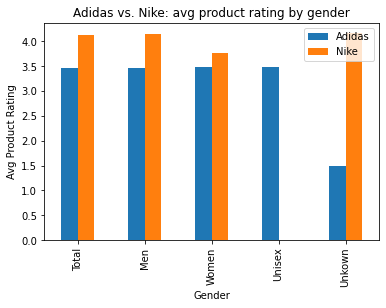

In [22]:
# Plot Ratings Nike vs. Adidas by gender
ratingsplotdata = pd.DataFrame(
    {"Adidas": [adi_rtng, adi_rtng_man, adi_rtg_women, adi_rtg_uni, adi_rtg_unkn],
    "Nike": [nike_rtng, nike_rtng_man, nike_rtng_woman, nike_rtg_uni, nike_rtg_unkn]}, 
    index=["Total", "Men", "Women", "Unisex", "Unkown"])
ratingsplotdata.plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Avg Product Rating")
plt.title("Adidas vs. Nike: avg product rating by gender");

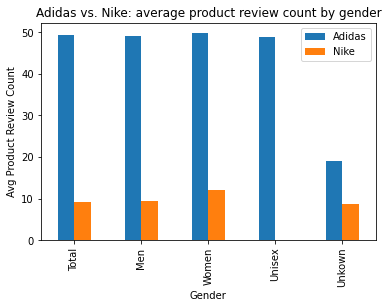

In [21]:
# Plot Reviews Nike vs. Adidas by gender
ratingsplotdata = pd.DataFrame(
    {"Adidas": [adi_revw, adi_revw_man, adi_revw_woman, adi_revw_uni, adi_revw_unk],
    "Nike": [nike_revw, nike_revw_man, nike_revw_woman, nike_revw_uni, nike_revw_unk]}, 
    index=["Total", "Men", "Women", "Unisex", "Unkown"])
ratingsplotdata.plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Avg Product Review Count")
plt.title("Adidas vs. Nike: average product review count by gender");

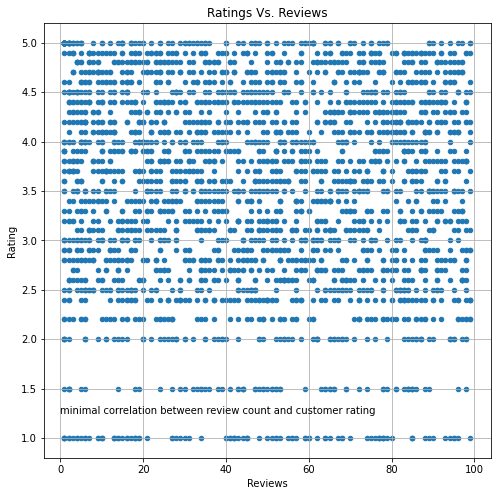

In [27]:
# Create scatter plot for reviews vs rating
sandbox.plot(kind="scatter", x="Reviews", y="Rating", grid=True, figsize=(8,8),
              title="Ratings Vs. Reviews")
plt.annotate("minimal correlation between review count and customer rating", (0,1.25))
plt.show()

In [29]:
# Correlation between avg rating and avg review (Nike)
nike_ratings = nike_rtng_df.iloc[:,7]
nike_reviews = nike_rtng_df.iloc[:,8]
correlation = sts.pearsonr(nike_ratings,nike_reviews)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.03


In [30]:
#-------------------------------------------------------------------------
# DISCOUNT ANALYSIS: compare Adidas vs. Nike 
#-------------------------------------------------------------------------
# add columns for Listing Price $, Sale Price $, and Discount $ 
sandbox["Listing Price $"]= ""
sandbox["Sale Price $"]= ""
sandbox["Discount $"]= ""
# populate columns for Listing Price $, Sale Price $, and Discount $ 
for row in sandbox:
    sandbox["Listing Price $"] = sandbox["Listing Price"]/100
    sandbox["Sale Price $"] = sandbox["Sale Price"]/100
    sandbox["Discount $"] = sandbox["Listing Price $"] - sandbox["Sale Price $"]
# Discount Comparison
Nike_Total = sandbox.loc[sandbox["True_Brand"] == "Nike"]
Adidas_Total = sandbox.loc[sandbox["True_Brand"] == "Adidas"]
# Create DataFrames for different genders
Nike_Men = Nike_Total.loc[Nike_Total["Gender"] == "Men"]
Adidas_Men = Adidas_Total.loc[Adidas_Total["Gender"] == "Men"]
Nike_Women = Nike_Total.loc[Nike_Total["Gender"] == "Women"]
Adidas_Women = Adidas_Total.loc[Adidas_Total["Gender"] == "Women"]
Nike_Unknown = Nike_Total.loc[Nike_Total["Gender"] == "Unknown"]
Adidas_Unknown = Adidas_Total.loc[Adidas_Total["Gender"] == "Unknown"]
Nike_Unisex = Nike_Total.loc[Nike_Total["Gender"] == "Unisex"]
Adidas_Unisex = Adidas_Total.loc[Adidas_Total["Gender"] == "Unisex"]
# --------------------------------------------------------------------
# NIKE | Create Discount Statistics for Total, Men, Women, Unisex, Unknown
# --------------------------------------------------------------------
Nike_Total_List_Price = sum(Nike_Total["Listing Price $"])/len(Nike_Total)
Nike_Total_Sale_Price = sum(Nike_Total["Sale Price $"])/len(Nike_Total)
Nike_Total_Discount_Dollars = Nike_Total_List_Price - Nike_Total_Sale_Price
Nike_Total_Discount_Percent = Nike_Total_Discount_Dollars / Nike_Total_List_Price
# --------------------------------------------------------------------
Nike_Men_List_Price = sum(Nike_Men["Listing Price $"])/len(Nike_Men)
Nike_Men_Sale_Price = sum(Nike_Men["Sale Price $"])/len(Nike_Men)
Nike_Men_Discount_Dollars = Nike_Men_List_Price - Nike_Men_Sale_Price
Nike_Men_Discount_Percent = Nike_Men_Discount_Dollars / Nike_Men_List_Price
# --------------------------------------------------------------------
Nike_Women_List_Price = sum(Nike_Women["Listing Price $"])/len(Nike_Women)
Nike_Women_Sale_Price = sum(Nike_Women["Sale Price $"])/len(Nike_Women)
Nike_Women_Discount_Dollars = Nike_Women_List_Price - Nike_Women_Sale_Price
Nike_Women_Discount_Percent = Nike_Women_Discount_Dollars / Nike_Women_List_Price
# --------------------------------------------------------------------
# Ignore Nike Unisex, there are none
# --------------------------------------------------------------------
# Nike_Unisex_List_Price = sum(Nike_Unisex["Listing Price $"])/len(Nike_Unisex)
# Nike_Unisex_Sale_Price = sum(Nike_Unisex["Sale Price $"])/len(Nike_Unisex)
# Nike_Unisex_Discount_Dollars = Nike_Unisex_List_Price - Nike_Unisex_Sale_Price
# Nike_Unisex_Discount_Percent = Nike_Unisex_Discount_Dollars / Nike_Unisex_List_Price
# --------------------------------------------------------------------
Nike_Unknown_List_Price = sum(Nike_Unknown["Listing Price $"])/len(Nike_Unknown)
Nike_Unknown_Sale_Price = sum(Nike_Unknown["Sale Price $"])/len(Nike_Unknown)
Nike_Unknown_Discount_Dollars = Nike_Unknown_List_Price - Nike_Unknown_Sale_Price
Nike_Unknown_Discount_Percent = Nike_Unknown_Discount_Dollars / Nike_Unknown_List_Price
# --------------------------------------------------------------------
# ADIDAS | Create Discount Statistics for Total, Men, Women, Unisex, Unknown
# --------------------------------------------------------------------
Adidas_Total_List_Price = sum(Adidas_Total["Listing Price $"])/len(Adidas_Total)
Adidas_Total_Sale_Price = sum(Adidas_Total["Sale Price $"])/len(Adidas_Total)
Adidas_Total_Discount_Dollars = Adidas_Total_List_Price - Adidas_Total_Sale_Price
Adidas_Total_Discount_Percent = Adidas_Total_Discount_Dollars / Adidas_Total_List_Price
# --------------------------------------------------------------------
Adidas_Men_List_Price = sum(Adidas_Men["Listing Price $"])/len(Adidas_Men)
Adidas_Men_Sale_Price = sum(Adidas_Men["Sale Price $"])/len(Adidas_Men)
Adidas_Men_Discount_Dollars = Adidas_Men_List_Price - Adidas_Men_Sale_Price
Adidas_Men_Discount_Percent = Adidas_Men_Discount_Dollars / Adidas_Men_List_Price
# --------------------------------------------------------------------
Adidas_Women_List_Price = sum(Adidas_Women["Listing Price $"])/len(Adidas_Women)
Adidas_Women_Sale_Price = sum(Adidas_Women["Sale Price $"])/len(Adidas_Women)
Adidas_Women_Discount_Dollars = Adidas_Women_List_Price - Adidas_Women_Sale_Price
Adidas_Women_Discount_Percent = Adidas_Women_Discount_Dollars / Adidas_Women_List_Price
# --------------------------------------------------------------------
Adidas_Unisex_List_Price = sum(Adidas_Unisex["Listing Price $"])/len(Adidas_Unisex)
Adidas_Unisex_Sale_Price = sum(Adidas_Unisex["Sale Price $"])/len(Adidas_Unisex)
Adidas_Unisex_Discount_Dollars = Adidas_Unisex_List_Price - Adidas_Unisex_Sale_Price
Adidas_Unisex_Discount_Percent = Adidas_Unisex_Discount_Dollars / Adidas_Unisex_List_Price
# --------------------------------------------------------------------
Adidas_Unknown_List_Price = sum(Adidas_Unknown["Listing Price $"])/len(Adidas_Unknown)
Adidas_Unknown_Sale_Price = sum(Adidas_Unknown["Sale Price $"])/len(Adidas_Unknown)
Adidas_Unknown_Discount_Dollars = Adidas_Unknown_List_Price - Adidas_Unknown_Sale_Price
Adidas_Unknown_Discount_Percent = Adidas_Unknown_Discount_Dollars / Adidas_Unknown_List_Price

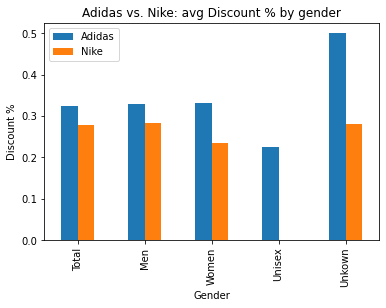

In [31]:
# Plot Nike vs. Adidas Discounting by Gender
Nike_Unisex_Discount_Percent = 0
discountingdata = pd.DataFrame(
    {"Adidas": [Adidas_Total_Discount_Percent, Adidas_Men_Discount_Percent, Adidas_Women_Discount_Percent, Adidas_Unisex_Discount_Percent, Adidas_Unknown_Discount_Percent],
    "Nike": [Nike_Total_Discount_Percent, Nike_Men_Discount_Percent, Nike_Women_Discount_Percent, Nike_Unisex_Discount_Percent, Nike_Unknown_Discount_Percent]}, 
    index=["Total", "Men", "Women", "Unisex", "Unkown"])
# Plot a bar chart
discountingdata.plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Discount %")
plt.title("Adidas vs. Nike: avg Discount % by gender");

In [33]:
sandbox.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,True_Brand,Gender,Listing Price $,Sale Price $,Discount $
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,Adidas,Women,149.99,74.99,75.0
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,Adidas,Women,75.99,37.99,38.0
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,Adidas,Women,9.99,5.99,4.0
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,Adidas,Women,69.99,34.99,35.0
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,Adidas,Women,79.99,39.99,40.0


C:\Users\AFanch\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


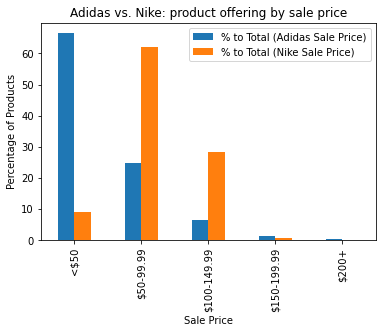

In [52]:
#--------------------------------------------------------------
# SALE PRICE: product count by sale price bins
#--------------------------------------------------------------
#begin the pricing tier comparison of Nike and Adidas using Sale_Price
pricing_tier_df = sandbox[["True_Brand", "Sale Price $"]]
bins = [0, 49.99, 99.99, 149.99, 199.99, 3000]
labels = ["<$50","$50-99.99", "$100-149.99", "$150-199.99", "$200+"]
pricing_tier_df["Sale_Price_Tier"] = pd.cut(pricing_tier_df["Sale Price $"],bins,labels = labels )
pricing_tier_df.reset_index()
#create a new Nike dataframe
nike_pricing_df = pricing_tier_df[pricing_tier_df["True_Brand"] == 'Nike']
#create a total count of Nike products.  
nike_total_product_count = nike_pricing_df["True_Brand"].count()
nike_total_product_count
nike_count_per_tier = nike_pricing_df["Sale_Price_Tier"].value_counts()
#calculate the % to total per each price tier
nike_percent_to_total = (nike_count_per_tier / nike_total_product_count)*100
#create a new Nike dataframe that shows the count of product in each price tier as well as % to Total
nike_summary = pd.DataFrame({"Nike Product Count": nike_count_per_tier,
                                    "% to Total (Nike Sale Price)": nike_percent_to_total})
nike_summary = nike_summary.sort_index()
#create a new Adidas dataframe
adidas_pricing_df = pricing_tier_df[pricing_tier_df["True_Brand"] == 'Adidas']
#create a total count of Nike products.  
adidas_total_product_count = adidas_pricing_df["True_Brand"].count()
adidas_total_product_count
adidas_count_per_tier = adidas_pricing_df["Sale_Price_Tier"].value_counts()
#calculate the % to total per each price tier
adidas_percent_to_total = (adidas_count_per_tier / adidas_total_product_count)*100
#create a new Nike dataframe that shows the count of product in each price tier as well as % to Total
adidas_summary = pd.DataFrame({"Adidas Product Count": adidas_count_per_tier,
                                    "% to Total (Adidas Sale Price)": adidas_percent_to_total})
adidas_summary = adidas_summary.sort_index()
pricing_comparison = pd.concat([adidas_summary, nike_summary], axis=1, sort=False)
pricing_comparison[['% to Total (Adidas Sale Price)','% to Total (Nike Sale Price)']].plot(kind='bar')
plt.xlabel("Sale Price")
plt.ylabel("Percentage of Products")
plt.title("Adidas vs. Nike: product offering by sale price")
plt.show()

C:\Users\AFanch\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


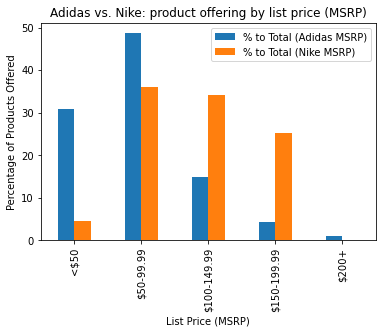

In [58]:
#--------------------------------------------------------------
# LIST PRICE: product count by list price bins
#--------------------------------------------------------------
#begin the pricing tier comparison of Nike and Adidas using Listing_Price
pricing_tier_df2 = sandbox[["True_Brand", "Listing Price $"]]
pricing_tier_df2.reset_index()
bins = [0, 49.99, 99.99, 149.99, 199.99, 3000]
labels = ["<$50","$50-99.99", "$100-149.99", "$150-199.99", "$200+"]
pricing_tier_df2["List_Price_Tier"] = pd.cut(pricing_tier_df2["Listing Price $"],bins,labels = labels )
pricing_tier_df2
#create a new Nike dataframe w/ List_Price and Pricing Tier
nike_pricing_df2 = pricing_tier_df2[pricing_tier_df2["True_Brand"] == 'Nike']
#create a total count of Nike products.  
nike_total_product_count2 = nike_pricing_df2["True_Brand"].count()
nike_total_product_count2
nike_count_per_tier2 = nike_pricing_df2["List_Price_Tier"].value_counts()
#calculate the % to total per each price tier
nike_percent_to_total2 = (nike_count_per_tier2 / nike_total_product_count2)*100
#create a new Nike dataframe that shows the count of product in each price tier as well as % to Total
nike_summary2 = pd.DataFrame({"Nike Product Count2": nike_count_per_tier2,
                                    "% to Total (Nike MSRP)": nike_percent_to_total2})
nike_summary2 = nike_summary2.sort_index()
#create a new Nike dataframe w/ List_Price and Pricing Tier
adidas_pricing_df2 = pricing_tier_df2[pricing_tier_df2["True_Brand"] == 'Adidas']
#create a total count of Nike products.  
adidas_total_product_count2 = adidas_pricing_df2["True_Brand"].count()
adidas_total_product_count2
adidas_count_per_tier2 = adidas_pricing_df2["List_Price_Tier"].value_counts()
#calculate the % to total per each price tier
adidas_percent_to_total2 = (adidas_count_per_tier2 / adidas_total_product_count2)*100
#create a new Nike dataframe that shows the count of product in each price tier as well as % to Total
adidas_summary2 = pd.DataFrame({"Adidas Product Count2": adidas_count_per_tier2,
                                    "% to Total (Adidas MSRP)": adidas_percent_to_total2})
adidas_summary2 = adidas_summary2.sort_index()
#create a new dataframe by merging Nike and Adidas dataframes
pricing_comparison2 = pd.concat([adidas_summary2, nike_summary2], axis=1, sort=False)                   
#plot a bar chart that compare Adidas and Nike's listing price of the products in the market in April 2020
pricing_comparison2[['% to Total (Adidas MSRP)','% to Total (Nike MSRP)']].plot(kind='bar')
plt.xlabel("List Price (MSRP)")
plt.ylabel("Percentage of Products Offered")
plt.title("Adidas vs. Nike: product offering by list price (MSRP)")
plt.show()

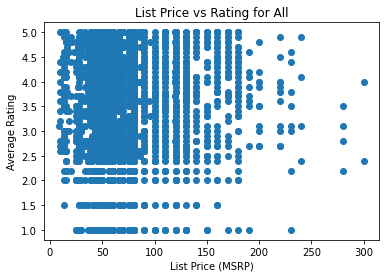

In [61]:
# List price vs Avg Rating
Rating = sandbox["Rating"]
list_price = sandbox["Listing Price $"]
plt.scatter(list_price, Rating )
plt.title("List Price vs Rating for All")
plt.xlabel("List Price (MSRP)")
plt.ylabel("Average Rating")
plt.show()

In [68]:
# Split data into Nike vs. Adidas
adidas_file = sandbox.loc[sandbox["True_Brand"] == "Adidas"]
nike_file = sandbox.loc[sandbox["True_Brand"] == "Nike"]



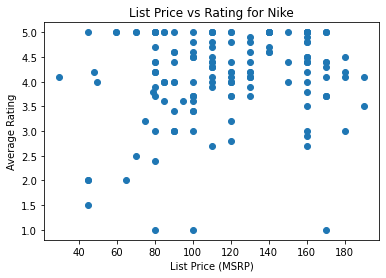

In [69]:
# NIKE List price vs Avg Rating
nike_rating = nike_file["Rating"]
nike_price = nike_file["Listing Price $"]
plt.scatter(nike_price, nike_rating)
plt.title("List Price vs Rating for Nike")
plt.xlabel("List Price (MSRP)")
plt.ylabel("Average Rating")
plt.show()

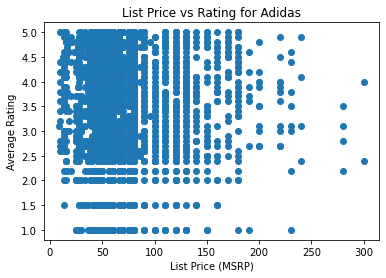

In [71]:
# ADIDAS List price vs Avg Rating
adidas_rating = adidas_file["Rating"]
adidas_price = adidas_file["Listing Price $"]
plt.scatter(adidas_price, adidas_rating)
plt.title("List Price vs Rating for Adidas")
plt.xlabel("List Price (MSRP)")
plt.ylabel("Average Rating")
plt.show()

The r-squared value is: 0.00014861368068691977


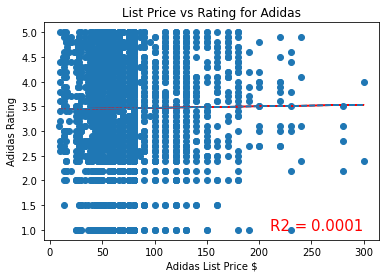

In [89]:
#-----------------------------------------------------------------------
# Look for correlation between List Price & Customer Rating for Adidas
#-----------------------------------------------------------------------
ad_slope, ad_int, ad_r, ad_p, ad_std_err = stats.linregress(adidas_price,adidas_rating)
ad_fit = ad_slope * adidas_price + ad_int
(slope, intercept, rvalue, pvalue, stderr) = linregress(adidas_price,adidas_rating)
regress_values = adidas_price * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(adidas_price,regress_values,"r-")
plt.annotate("R2 =",(210,1),fontsize=15,color="red")
plt.annotate(round((rvalue**2),4),(250,1),fontsize=15,color="red")
plt.scatter(adidas_price,adidas_rating)
plt.title("List Price vs Rating for Adidas")
plt.xlabel('Adidas List Price $')
plt.ylabel('Adidas Rating')
plt.plot(adidas_price, ad_fit, "--")
print(f"The r-squared value is: {rvalue**2}")

### R value is negligible, indicating there is no significant relationship between price and rating

The r-squared value is: 0.032239940823873735


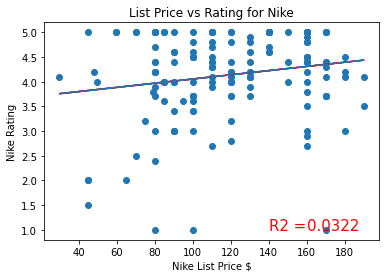

In [94]:
#-----------------------------------------------------------------------
# Look for correlation between List Price & Customer Rating for Nike
#-----------------------------------------------------------------------
nike_slope, nike_int, nike_r, nike_p, nike_std_err = stats.linregress(nike_price, nike_rating)
nike_fit = nike_slope * nike_price + nike_int
(slope, intercept, rvalue, pvalue, stderr) = linregress(nike_price, nike_rating)
regress_values = nike_price * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nike_price,regress_values,"r-")
plt.annotate("R2 =",(140,1),fontsize=15,color="red")
plt.annotate(round((rvalue**2),4),(160,1),fontsize=15,color="red")
plt.scatter(nike_price, nike_rating)
plt.title("List Price vs Rating for Nike")
plt.xlabel('Nike List Price $')
plt.ylabel('Nike Rating')
plt.plot(nike_price, nike_fit, "--")
print(f"The r-squared value is: {rvalue**2}")

## R value is very small, indicating there is not a significant relationship between price and rating